# Test 1

#### Dutchak Bohdan

Leading logistic firm is evaluating you for a Machine Learning internship.
To that end you have been asked to analyze the dataset 
found here /home/data/BlueBlack/bb.csv. They encourage you to use
Logistic, NaiveBayes and kNN to analyze this dataset.

### My calculations

In [1]:
library(ggplot2)
library(GGally)
library(ggcorrplot)
library(e1071)
library(class)
library(cowplot)
library(naivebayes)
library(plotly)
options(warn = -1)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

naivebayes 0.9.7 loaded


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




In [2]:
data <- read.csv("data/bb.csv")
head(data)

,X,X.Y,X.label
,<int>,<chr>,<chr>
1,5,a,BLUE
2,5,b,BLACK
3,5,c,BLUE
4,5,d,BLACK
5,5,e,BLACK
6,5,f,BLACK


First of all we have to get familiar with the data. Let's do it

In [3]:
print("Shape of dataframe is :")
dim(data)

[1] "Shape of dataframe is :"


[1] 36  3

So the number of features is relatively big to the number of observations. It is a sign, that Bayes Classifier can be fitted good on this data, but it is still to early to make decisions. Let's look at the distribution of the data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



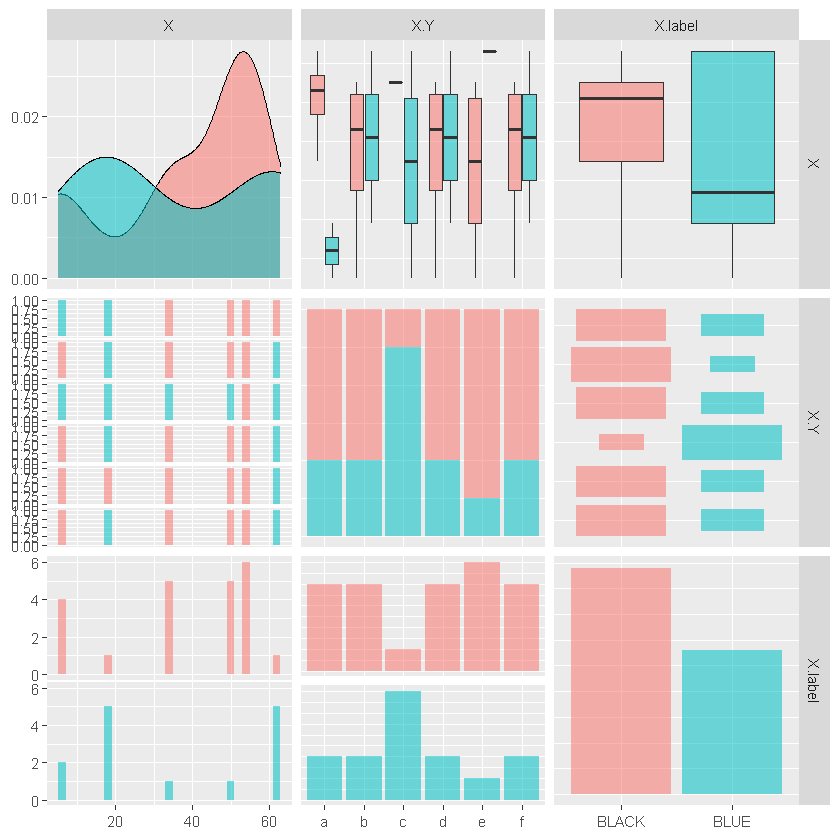

In [4]:
ggpairs(data, aes(color=X.label, alpha=0.5))

In [5]:
data$X.Y <- replace(data$X.Y, data$X.Y == '\ta', 1)
data$X.Y <- replace(data$X.Y, data$X.Y == '\tb', 2)
data$X.Y <- replace(data$X.Y, data$X.Y == '\tc', 3)
data$X.Y <- replace(data$X.Y, data$X.Y == '\td', 4)
data$X.Y <- replace(data$X.Y, data$X.Y == '\te', 5)
data$X.Y <- replace(data$X.Y, data$X.Y == '\tf', 6)

data$X.label <- replace(data$X.label, data$X.label == '\tBLACK', 0)
data$X.label <- replace(data$X.label, data$X.label == '\tBLUE', 1)

data$X.Y <- as.factor(data$X.Y)
data$X.label <- as.factor(data$X.label)

str(data)

'data.frame':	36 obs. of  3 variables:
 $ X      : int  5 5 5 5 5 5 19 19 19 19 ...
 $ X.Y    : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ X.label: Factor w/ 2 levels "0","1": 2 1 2 1 1 1 2 2 2 2 ...


In [6]:
summary(data)

       X      X.Y   X.label
 Min.   : 5   1:6   0:22   
 1st Qu.:19   2:6   1:14   
 Median :43   3:6          
 Mean   :38   4:6          
 3rd Qu.:55   5:6          
 Max.   :63   6:6          

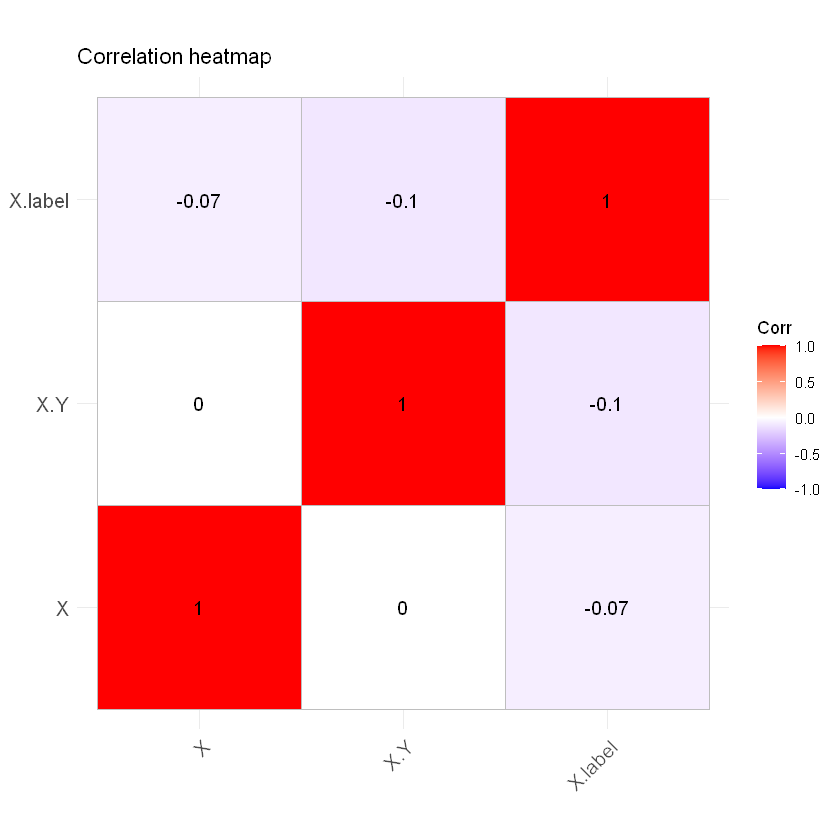

In [7]:
correlations <- cor(data %>% type.convert(as.is=TRUE))
ggcorrplot(correlations, lab=TRUE) + ggtitle("Correlation heatmap")

At this point, we know that data is quite symmetrical, but highly non-linear. It's feature distributions are way not normal, so I assume Logit will show poor results. Besides, there is no strong correlation between the target variable and features, so I assume Bayes classifier may show good results here. The only problem here is that both Logit and NB have linear decision boundaries, but our data has non linear distribution, that means more flexible models such as KNN with small $k$ can also be accurate with their predictions. Let's find this out.

In [95]:
set.seed(4) #Seed because 4 is my lucky number

sample <- sample(c(TRUE, FALSE), nrow(data), replace=TRUE, prob=c(0.6,0.4))
train <- data[sample, ]
test <- data[!sample, ]

test.X <- test[1:2]
test.Y <- test[3]

train.X<-train[1:2]
train.Y<-train[3]

message("Shape of test dataframe is ", dim(test)[1], 'x', dim(test)[2])
message("Shape of test dataframe is ", dim(train)[1], 'x', dim(train)[2])

Shape of test dataframe is 17x3

Shape of test dataframe is 19x3



In [96]:
logit.fit <- glm(X.label ~ X + X.Y, data=train, family = binomial)
summary(logit.fit)


Call:
glm(formula = X.label ~ X + X.Y, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4575  -0.8947  -0.6399   1.0658   1.6793  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.01745    1.50537   0.012    0.991
X           -0.02200    0.02714  -0.811    0.418
X.Y2         0.73055    1.95212   0.374    0.708
X.Y3         1.40750    1.78065   0.790    0.429
X.Y4        -0.29012    1.79324  -0.162    0.871
X.Y5         0.52669    1.89369   0.278    0.781
X.Y6        -0.72949    1.69676  -0.430    0.667

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 25.008  on 18  degrees of freedom
Residual deviance: 22.366  on 12  degrees of freedom
AIC: 36.366

Number of Fisher Scoring iterations: 4


Time for some Inference model estimation.

Deviance Residuals are pretty good, since they are close to be centred on 0 and are roughly symmetrical. All the features has large p-values, so they are not good predictors, but they are all we have :(

Unfortunately I can not explain this, since I have no idea where the data came from and what each feature mean.

Anyways, I assume, that this model will have big testing error

In [97]:
logit.pred <- predict(logit.fit, test.X, type="response")
logit.pred <- ifelse(test=logit.pred>0.5, yes=1, no=0)
message("LOGIT has ", round(mean(logit.pred == test.Y$X.label),2)*100, "% accuracy")

LOGIT has 71% accuracy



I'm surprised, it is not that bad as I expected. ISLR book says, that the accuracy can increase while cross-validation, but I don't think it can help me in this case, since generally this model is worse for this data in comparison to another models. If it's accuracy decrease due to another training set, the same will happen to other models, but they still will have better accuracy. I will provide a visual proof.

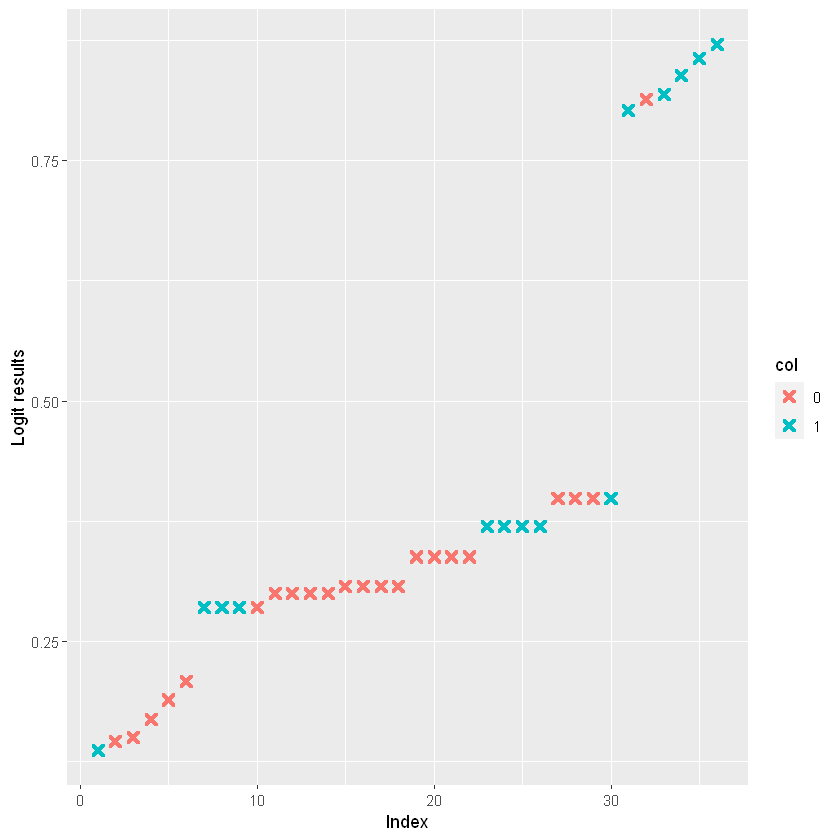

In [98]:
logit <-logit.fit <- glm(X.label ~ ., data=data, family = binomial)

predicted.data <- data.frame(probability.of.blue = logit$fitted.values, col=data$X.label)
predicted.data <- predicted.data[order(predicted.data$probability.of.blue, decreasing = FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)
ggplot(data=predicted.data, aes(x=rank, y=probability.of.blue)) + geom_point(aes(color=col), alpha=1, shape=4, stroke=2) + xlab("Index") + ylab("Logit results")


You can see that is has relatively many outliers to general number of observations. The reason is LOGIT uses linear decision boundary, but it is not applicable for this data. So even brute forcing all possible combinations of test/train data will not achieve good results.

Let's move to the Naive Bayes classifier

In [101]:
nb.fit <- naiveBayes(X.label ~ X + X.Y, data = train)
nb.fit


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.6315789 0.3684211 

Conditional probabilities:
   X
Y       [,1]     [,2]
  0 37.50000 21.57650
  1 29.85714 24.81551

   X.Y
Y            1          2          3          4          5          6
  0 0.16666667 0.08333333 0.08333333 0.16666667 0.16666667 0.33333333
  1 0.14285714 0.14285714 0.28571429 0.14285714 0.14285714 0.14285714


In [102]:
nb.pred <- predict(nb.fit, test)
message("NB has ", round(mean(nb.pred == test.Y$X.label),2)*100, "% accuracy")
table(nb.pred, test.Y$X.label)

NB has 82% accuracy



       
nb.pred  0  1
      0 10  3
      1  0  4

However NB also uses linear decision boundary for classification, this model has 2 **killing features**, that makes it's result so good. The first is it assumes there is no association between predictors. Since I don't know anything about the source of the data and the model's result is good, so I assume there is no association indeed. The second one is condition probability, that has no impact on perfectly balanced data, but here we have slightly imbalanced target variable (63% of class 0 (black) and 37% of class 1 (blue)).

Also we can not modify the model in order to decrease type-1 error, because we don't know is it bad. For the same reason I did not plot ROC curve.

Running KNN requires deciding the $k$. Let's find the best $k$ with the bias-variance tradeoff.

In [103]:
k_values = seq(1,12,by=1)
accuracy = rep(0,12)

for (i in 1:12){
    knn.pred <- knn(train.X, test.X, cl=train.Y$X.label, k=i)
    table(knn.pred, test.Y$X.label)
    message("KNN has ", round(mean(knn.pred == test.Y$X.label),3)*100, "% accuracy with k=",i)
    accuracy[i] = round(mean(knn.pred == test.Y$X.label),3)*100
}

KNN has 88.2% accuracy with k=1

KNN has 88.2% accuracy with k=2

KNN has 94.1% accuracy with k=3

KNN has 88.2% accuracy with k=4

KNN has 70.6% accuracy with k=5

KNN has 64.7% accuracy with k=6

KNN has 64.7% accuracy with k=7

KNN has 70.6% accuracy with k=8

KNN has 76.5% accuracy with k=9

KNN has 64.7% accuracy with k=10

KNN has 58.8% accuracy with k=11

KNN has 58.8% accuracy with k=12



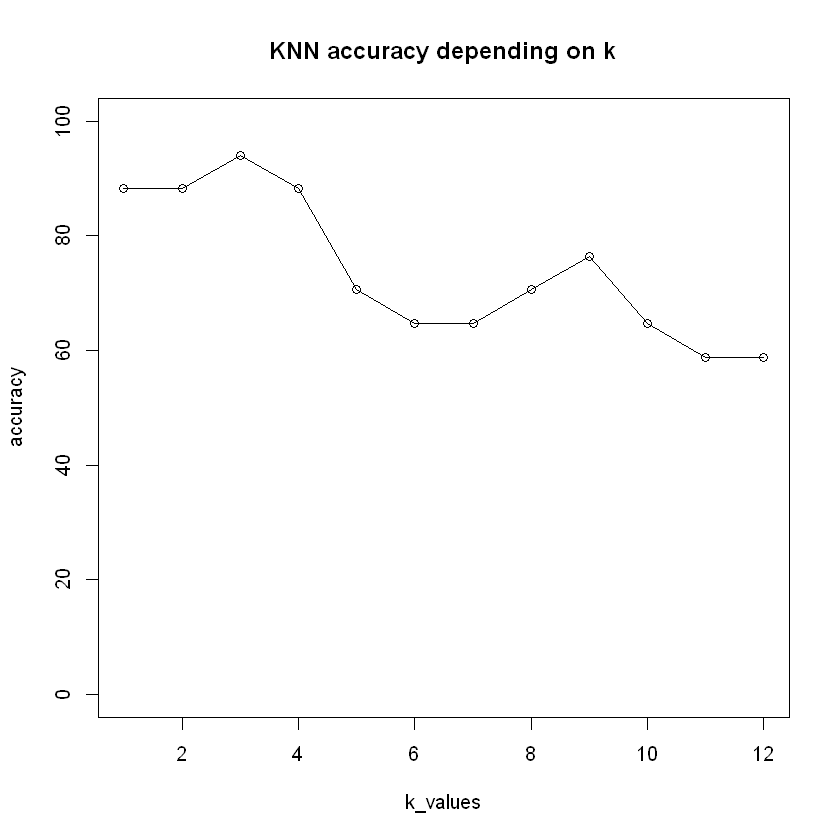

In [104]:
plot(k_values, accuracy, type="o", main="KNN accuracy depending on k", ylim=c(0,100))

As you can see, the best accuracy is at $k=4$

Also I would really like to show you plots with decision boundaries, but unfortunately he only way to do this is using library `ElemStatLearn` but it does not working on my R version.

AVG LOGIT accuracy: 62.16
AVG KNN, k=4 accuracy: 77.03
AVG NB accuracy: 64.88



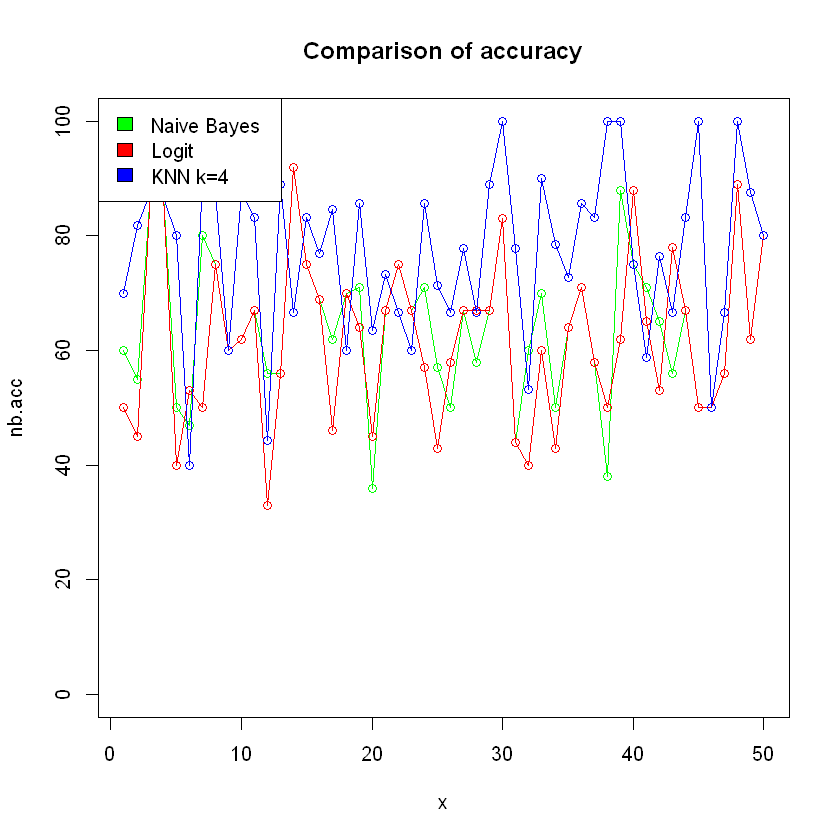

In [116]:
n = 50
x <- seq(1,n,by=1)
nb.acc <- rep(0,n)
logit.acc <- rep(0,n)
knn.acc <- rep(0,n)

for (i in 1:n){
    set.seed(i)
    sample <- sample(c(TRUE, FALSE), nrow(data), replace=TRUE, prob=c(0.7,0.3))
    train <- data[sample, ]
    test <- data[!sample, ]
    test.X <- test[1:2]
    test.Y <- test[3]
    train.X<-train[1:2]
    train.Y<-train[3]

    logit.fit <- glm(X.label ~ X + X.Y, data=train, family = binomial)
    logit.pred <- predict(logit.fit, test.X, type="response")
    logit.pred <- ifelse(test=logit.pred>0.5, yes=1, no=0)
    logit.acc[i] = round(mean(logit.pred == test.Y$X.label),2)*100

    nb.fit <- naiveBayes(X.label ~ X + X.Y, data = train)
    nb.pred <- predict(nb.fit, test.X)
    nb.acc[i] = round(mean(nb.pred == test.Y$X.label),2)*100

    knn.pred <- knn(train.X, test.X, cl=train.Y$X.label, k=4)
    knn.acc[i] = round(mean(knn.pred == test.Y$X.label),3)*100
}

plot(x, nb.acc, type="o", main="Comparison of accuracy", col="green", ylim=c(0,100))
lines(x, logit.acc, type="o", col="red")
lines(x, knn.acc, type="o", col="blue")
legend(x='topleft',legend=c("Naive Bayes", "Logit", "KNN k=4"),fill=c('green','red','blue'))

message("AVG LOGIT accuracy: ", mean(logit.acc),"\n", "AVG KNN, k=4 accuracy: ", mean(knn.acc),"\n", "AVG NB accuracy: ", mean(nb.acc))

Honestly, I am confused. Turned out LOGIT has pretty good results here, but according to the ISLR it should not. I can not explain this phenomenon. It only shows, that I Machine learning is the area that needs fundamental understanding of even simple models. For me it means that I should learn more \\-_-/

Anyways, KNN with $k=4$ shows the best result, while NB slightly leading on Logit.

### Question 1

Which of these models would you use to predict never seen before data and why?

Knowing that the number of observations is small and features does not correlate with the target variable, I would use Naive Bayes, since it performs good on such data, also we can see that distribution of features is not normal, so we probably need some flexible model, such as KNN.

### Question 2

Which of these models would you NOT use to predict and why?

I would not use Logit, and LDA here, because of the small dataset, week correlations and many outliers, that I can not delete, because the number of observations will get even smaller. Somehow it still shows fine results. My assumption of LOGIT showing poor results are from ISLR book pages 161-164.

### Question 3

What is it about this data that can best explain the performance of these models and why?

* `X` has weird distribution with 2 local maxima, also it does not have tendency of monotone decreasing on the tails of the distribution. IQRange is large in class "BLUE".
* `X.Y` has equal number of each class observations, but the distribution is similar in each of the target variable classes (except only class 'c', we can see that class "c" happens to be likely "BLUE" either that "BLACK"). So in most cases this feature will prevent linear models from accurate results.
* `X.label` is not balanced very good, so it increases the chances for NB to be accurate.

### Question 4

Did you have to transform the data for any of these algorithms and why?

I did not perform any feature engineering except encoding. I can not do this, since I don't know the source of data and meaning behind each of the features.

### Question 5

Propose novel methods to improve performance of each of these algorithms

* KNN - choosing the right value for k is the key.
* LOGIT - We could anyway increase number of observations and understand meanings befind the features in order to perform feature engineering.
* Naive Bayes - For example we could change the threshold in order to decrease type - 1 error if this data from some medical area.